<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [2]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


Dimensión: (569, 31)

Valores faltantes por columna:
 diagnosis              0
radius_mean            0
texture_mean           0
perimeter_mean         0
area_mean              0
smoothness_mean        0
compactness_mean       0
concavity_mean         0
concave points_mean    0
symmetry_mean          0
dtype: int64

Duplicados (filas): 0


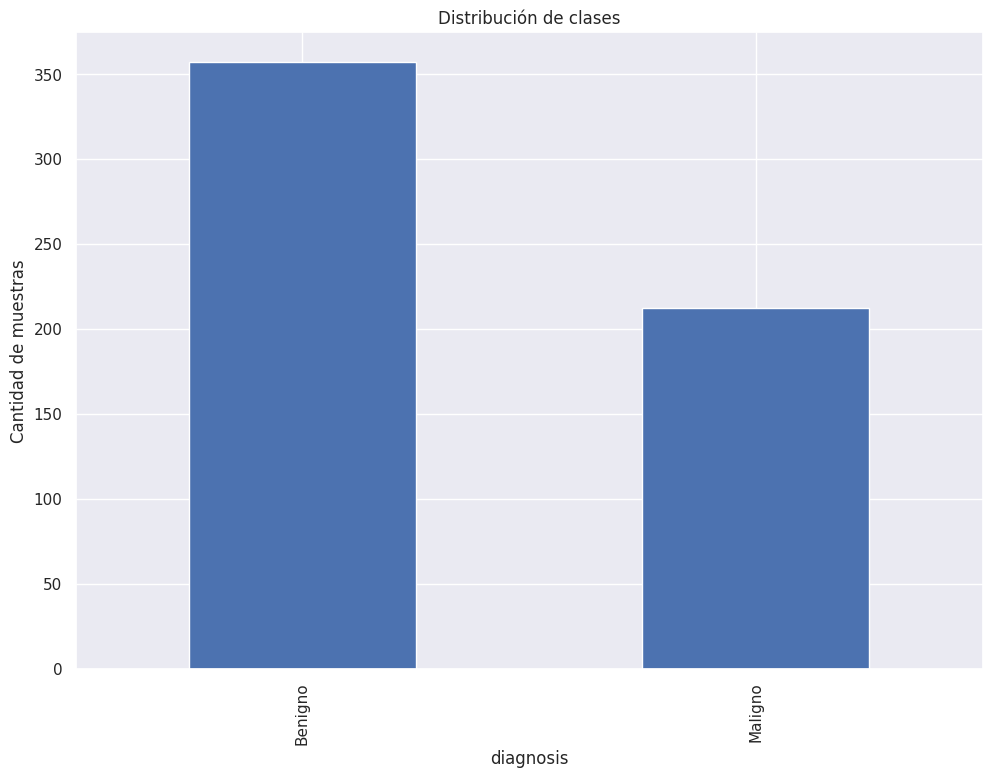

diagnosis,0,1
radius_mean,12.146524,17.462830
texture_mean,17.914762,21.604906
perimeter_mean,78.075406,115.365377
area_mean,462.790196,978.376415
smoothness_mean,0.092478,0.102898
compactness_mean,0.080085,0.145188
concavity_mean,0.046058,0.160775
concave points_mean,0.025717,0.087990
symmetry_mean,0.174186,0.192909
fractal_dimension_mean,0.062867,0.062680


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


diagnosis                     0            1
area_mean     50%    458.400000   932.000000
              count  357.000000   212.000000
              max    992.100000  2501.000000
              mean   462.790196   978.376415
              min    143.500000   361.600000
...                         ...          ...
texture_worst count  357.000000   212.000000
              max     41.780000    49.540000
              mean    23.515070    29.318208
              min     12.020000    16.670000
              std      5.493955     5.434804

[180 rows x 2 columns]

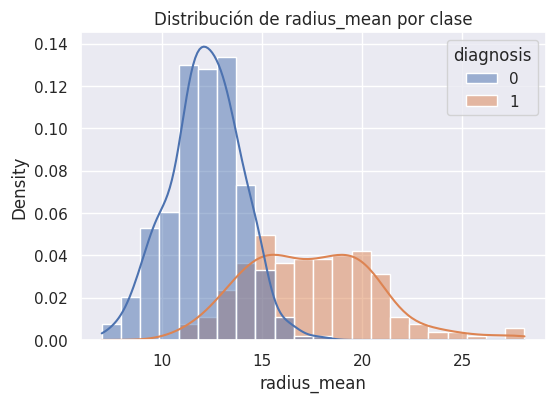

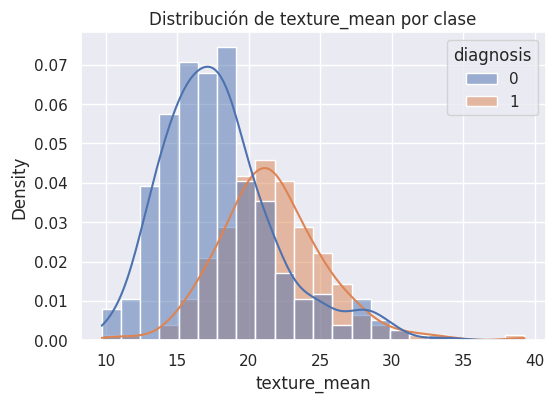

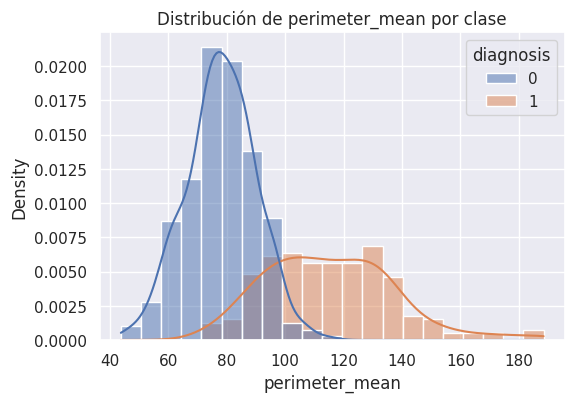

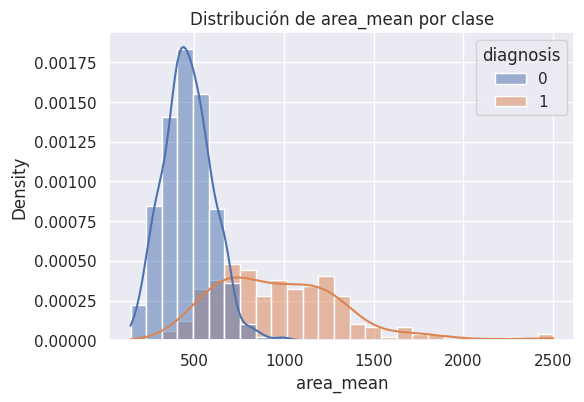

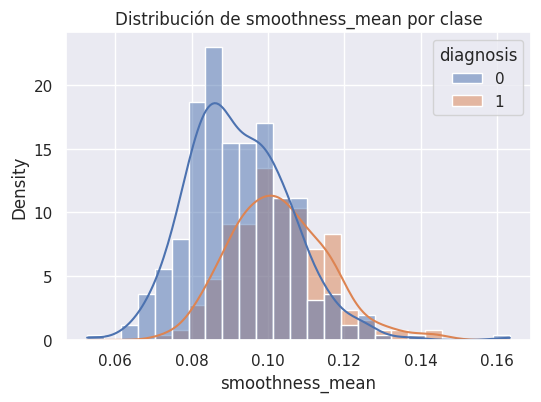

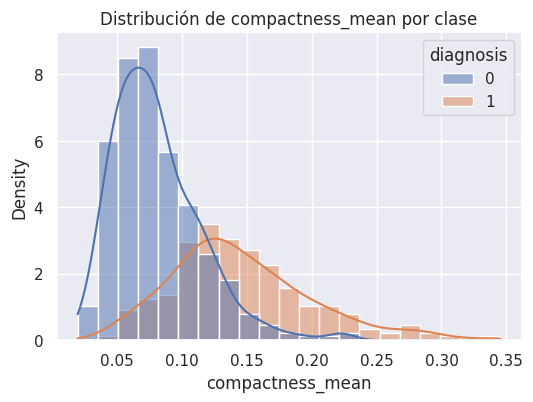

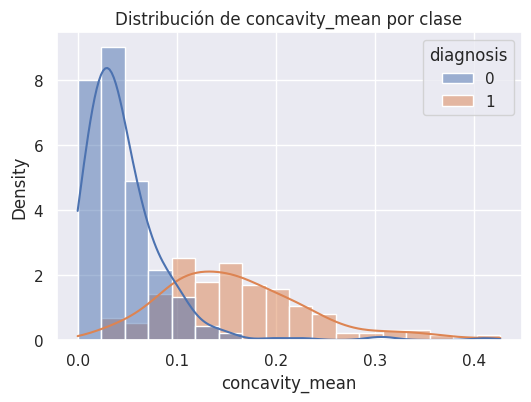

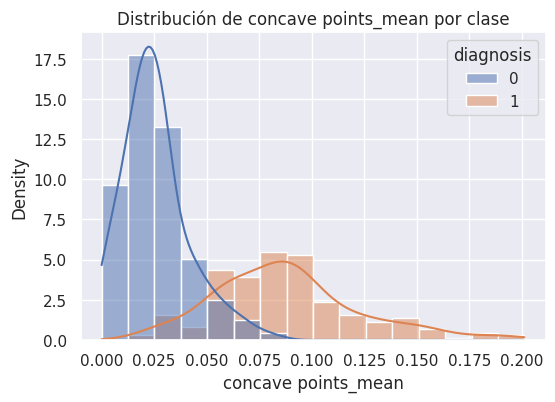

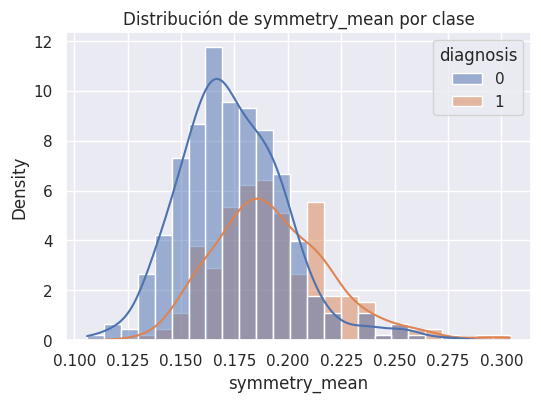

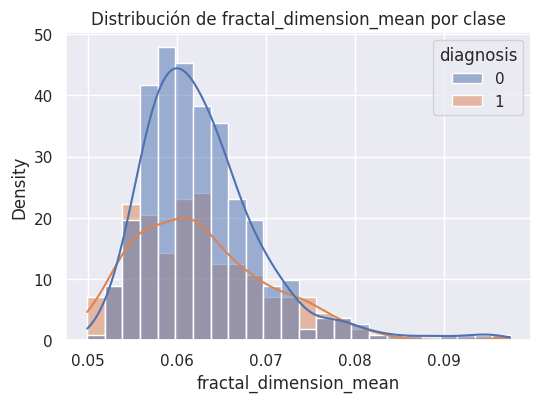

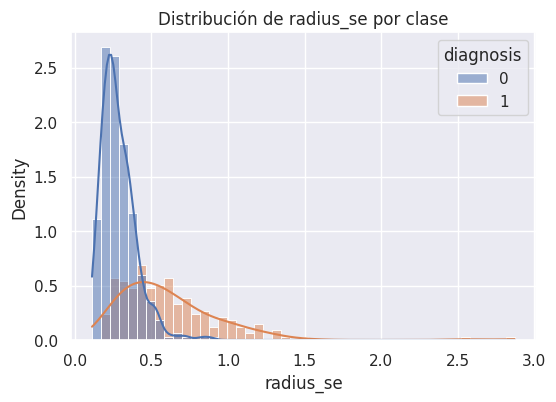

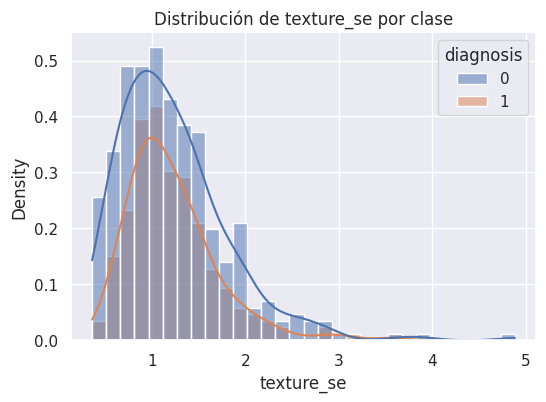

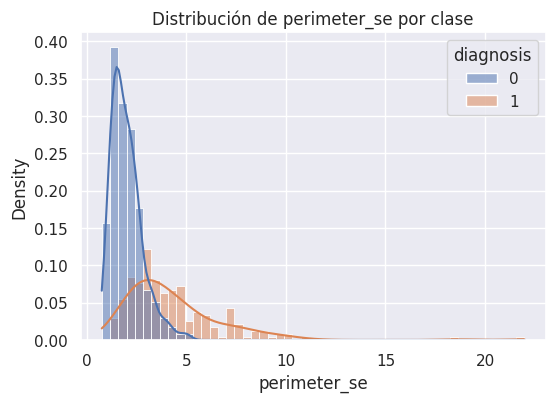

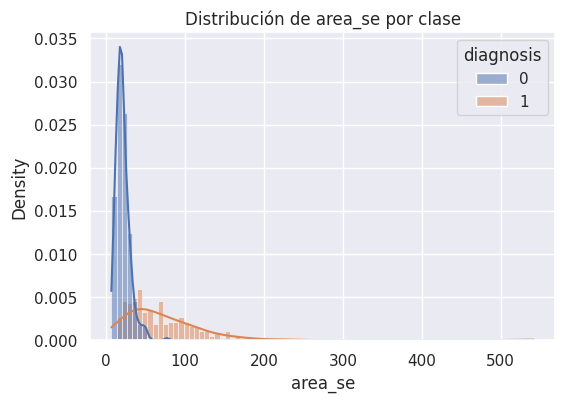

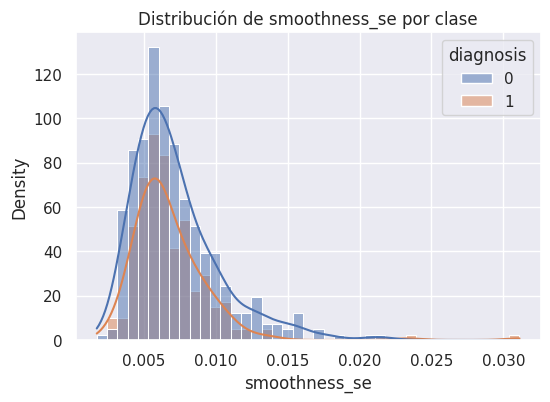

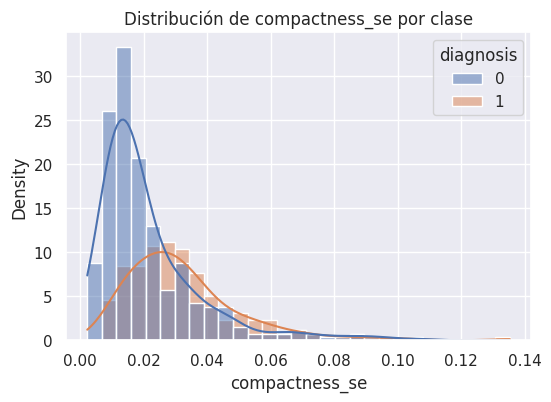

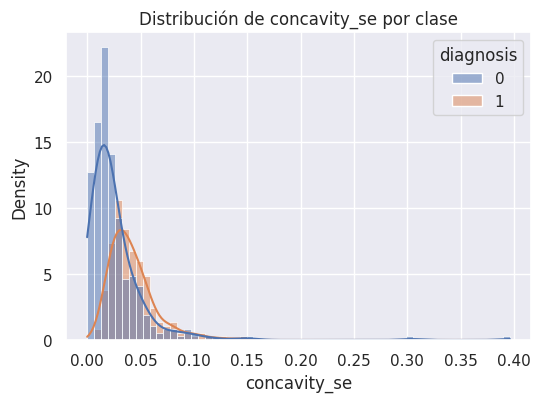

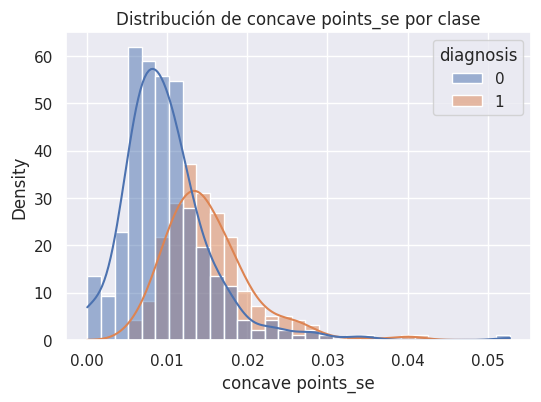

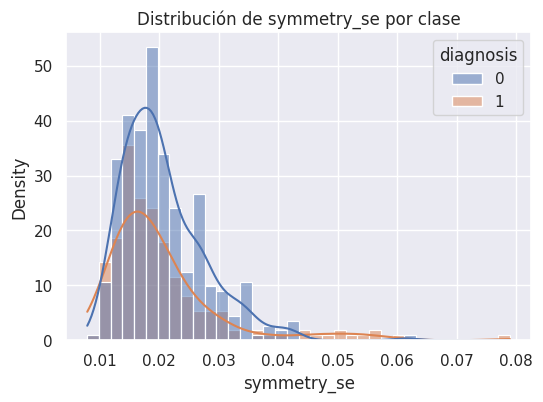

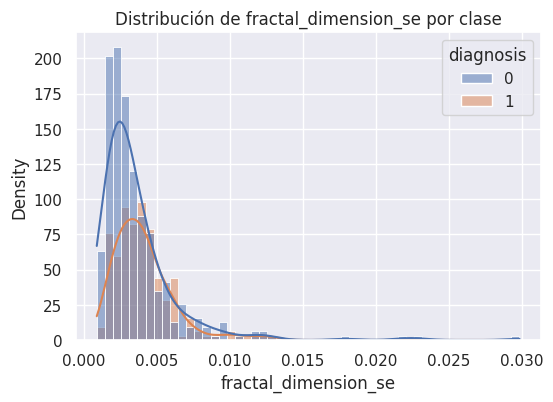

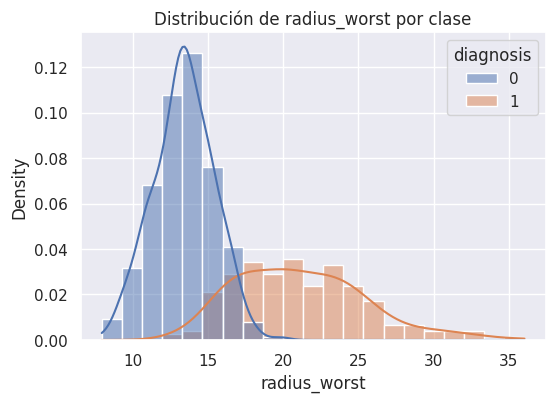

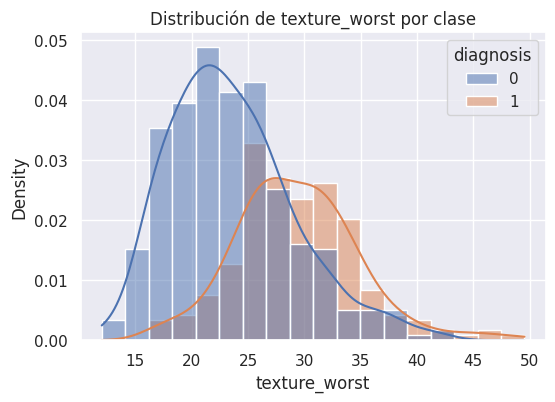

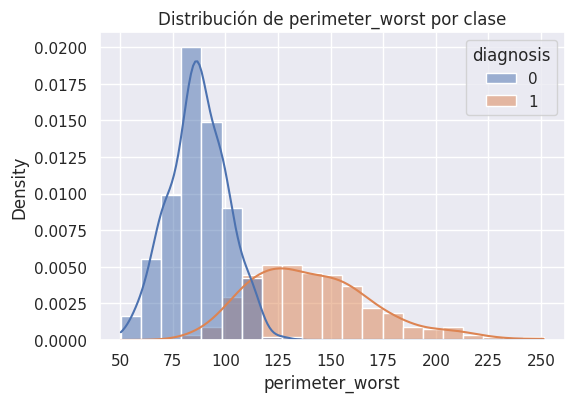

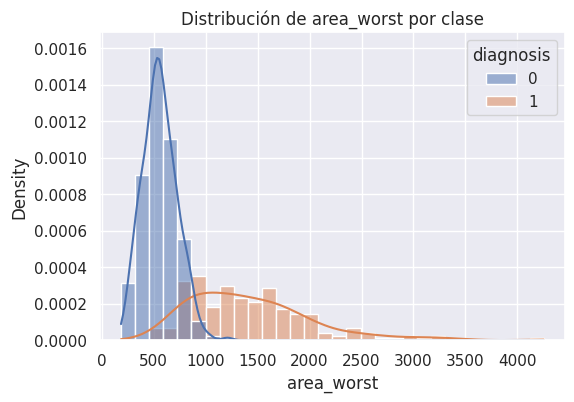

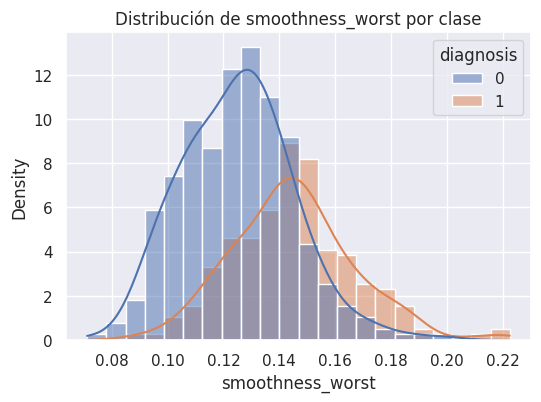

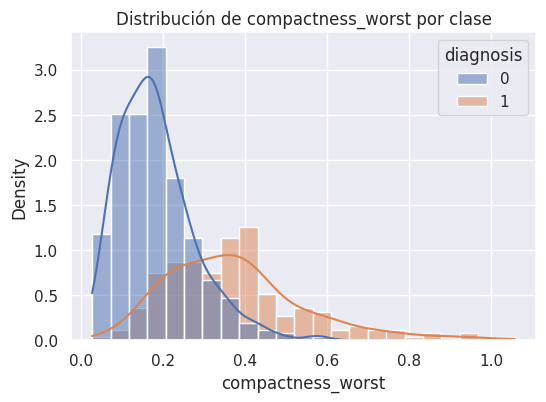

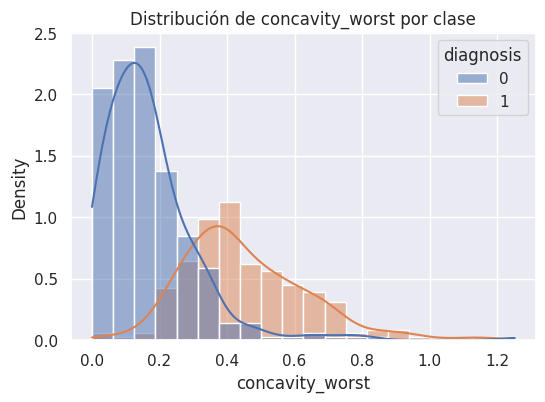

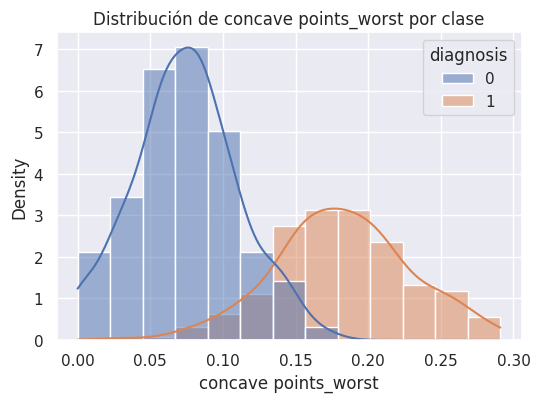

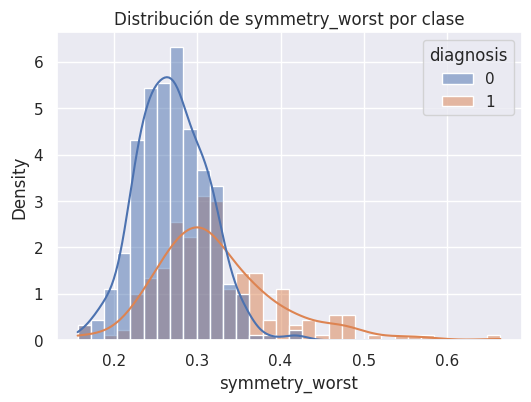

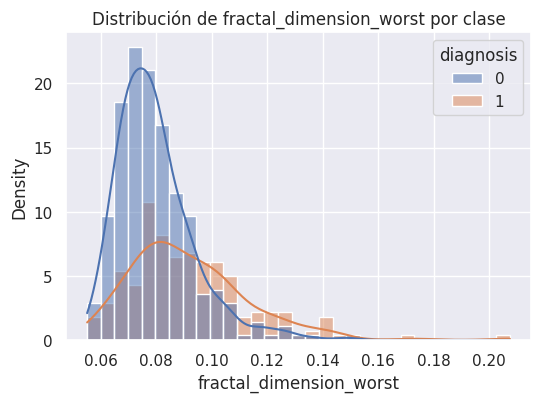

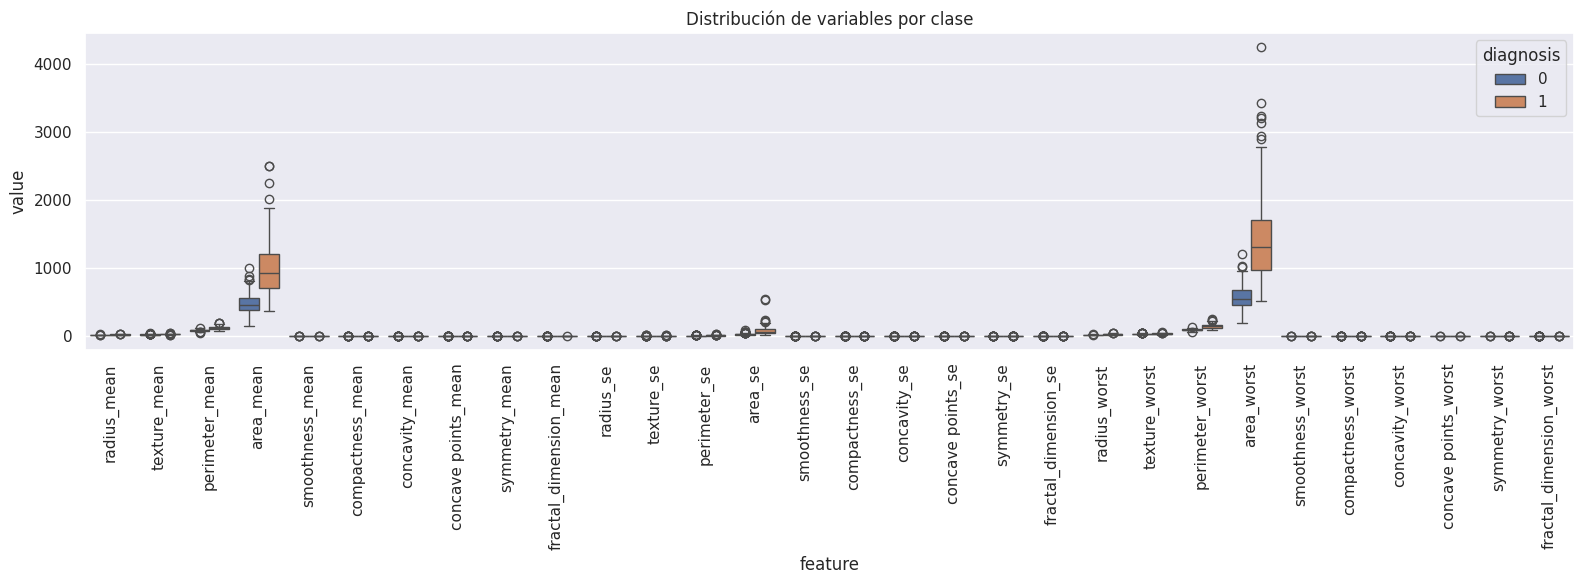

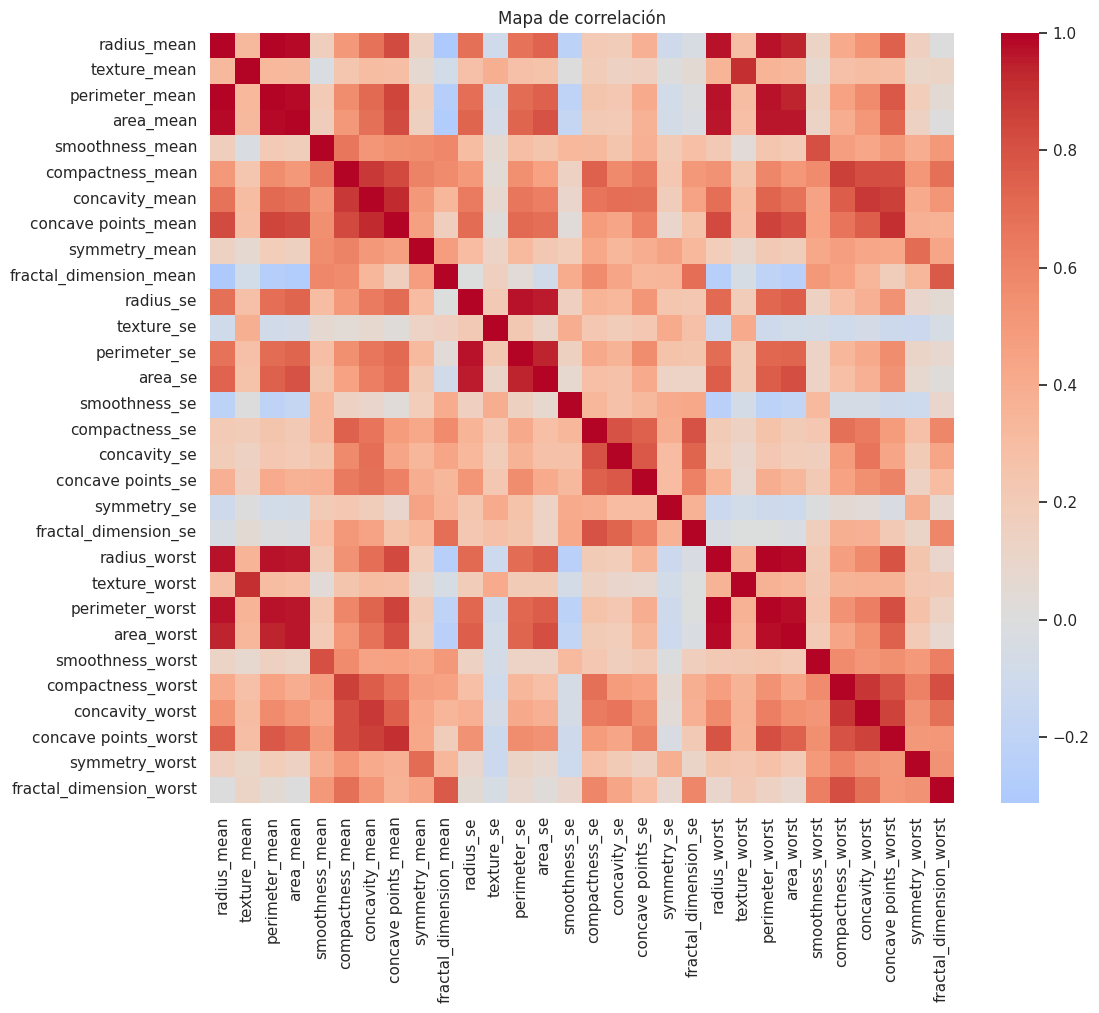

,0
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360
concavity_worst,0.659610


In [13]:
features = df.columns.drop('diagnosis')
X = df[features].copy()
y = df['diagnosis'].copy()


print("Dimensión:", df.shape)
print("\nValores faltantes por columna:\n", df.isna().sum().sort_values(ascending=False).head(10))
print("\nDuplicados (filas):", df.duplicated().sum())

# Balance de clases
ax = y.value_counts().rename({0:'Benigno', 1:'Maligno'}).plot(kind='bar')
ax.set_title("Distribución de clases")
ax.set_ylabel("Cantidad de muestras")
plt.show()


display(df.groupby('diagnosis')[features].mean().T.head(10))
# Estadísticas generales y por clase
display(df[features].describe().T)
display(df.groupby('diagnosis')[features].describe(percentiles=[]).transpose().sort_index())

for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='diagnosis', kde=True, stat='density')
    plt.title(f'Distribución de {col} por clase')
    plt.show()

df_melt = df.melt(
    id_vars='diagnosis',
    value_vars=features,
    var_name='feature',
    value_name='value'
)

plt.figure(figsize=(16,6))
sns.boxplot(
    data=df_melt,
    x='feature',
    y='value',
    hue='diagnosis'
)
plt.title("Distribución de variables por clase")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

corr = X.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Mapa de correlación")
plt.show()

corr_with_y = X.corrwith(y).sort_values(ascending=False)
corr_with_y.head(10)


Las características relacionadas con el tamaño e irregularidad del núcleo, como radius_worst, area_worst y concave points_mean, presentan las correlaciones más altas con el diagnóstico, por lo que son fuertes candidatas para la clasificación.

En cambio, variables como smoothness_se o symmetry_se muestran menor relación con la clase, indicando poca capacidad discriminativa.

Además, el mapa de correlación evidencia multicolinealidad entre grupos de variables similares (mean, se, worst), lo cual respalda aplicar selección de atributos o PCA en el preprocesamiento.


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [17]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

print("Shape datos originales:", X.shape)
print("Shape datos escalados:", Xs.shape)


# Calcular correlación absoluta con la clase
corr_with_y = X.corrwith(y).abs().sort_values(ascending=False)

# Seleccionar un top de variables más relevantes y menos redundantes
selected_features = corr_with_y.head(15).index.tolist()
selected_features


X_selected = df[selected_features].copy()
Xs_selected = scaler.fit_transform(X_selected)

print("Features seleccionadas:", selected_features)
print("Shape nuevo dataset:", Xs_selected.shape)

# División de datos (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    Xs_selected, y, test_size=0.30, random_state=42, stratify=y
)

X_train.shape, X_test.shape

Shape datos originales: (569, 30)
Shape datos escalados: (569, 30)
Features seleccionadas: ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se']
Shape nuevo dataset: (569, 15)


((398, 15), (171, 15))

Se estandarizaron las variables para asegurar escalas comparables y mejorar el rendimiento de modelos como SVM y PCA. También se redujo la multicolinealidad seleccionando las características más relevantes, lo que disminuye el ruido, evita sobreajuste y favorece una mejor generalización.


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


Varianza explicada por PC1 y PC2: 88.26%


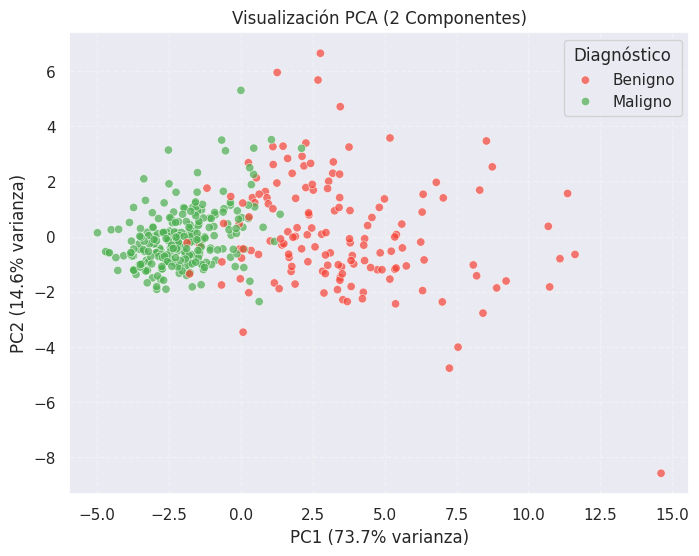

In [19]:
#PCA
pca = PCA(n_components=2, random_state=42)
Z = pca.fit_transform(X_train)

# DataFrame para facilitar visualización
pca_df = pd.DataFrame(Z, columns=['PC1','PC2'])
pca_df['diagnosis'] = y_train.values

# Varianza explicada
pca_var = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1 y PC2: {pca_var.sum():.2%}")
pca_var

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='diagnosis', palette=['#4CAF50','#F44336'], alpha=0.7)
plt.title("Visualización PCA (2 Componentes)")
plt.xlabel(f"PC1 ({pca_var[0]:.1%} varianza)")
plt.ylabel(f"PC2 ({pca_var[1]:.1%} varianza)")
plt.legend(title="Diagnóstico", labels=["Benigno","Maligno"])
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

El PCA muestra una separación visible entre tumores benignos y malignos, especialmente en el primer componente, lo que confirma la existencia de patrones lineales útiles para la clasificación. No obstante, persiste cierta superposición, por lo que es necesario utilizar más dimensiones para lograr una separación completa.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,Modelo,Accuracy,Precision,Recall,F1,AUC
0,Logistic Regression,0.982456,1.000000,0.953125,0.976000,0.999562
1,SVM,0.959064,0.983051,0.906250,0.943089,0.998102
2,Random Forest,0.953216,0.982759,0.890625,0.934426,0.993721


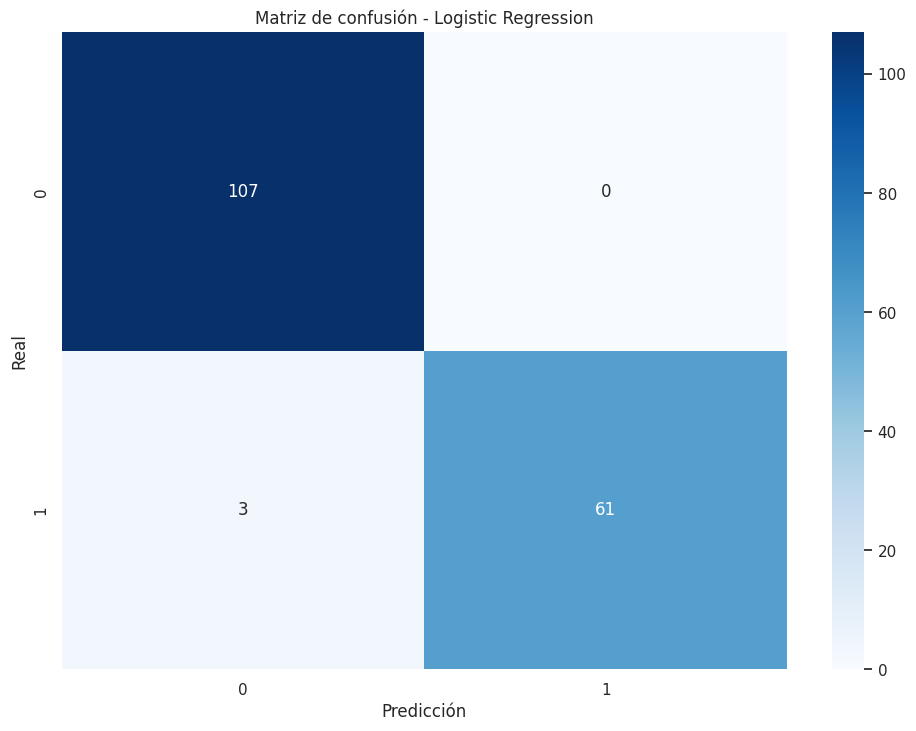

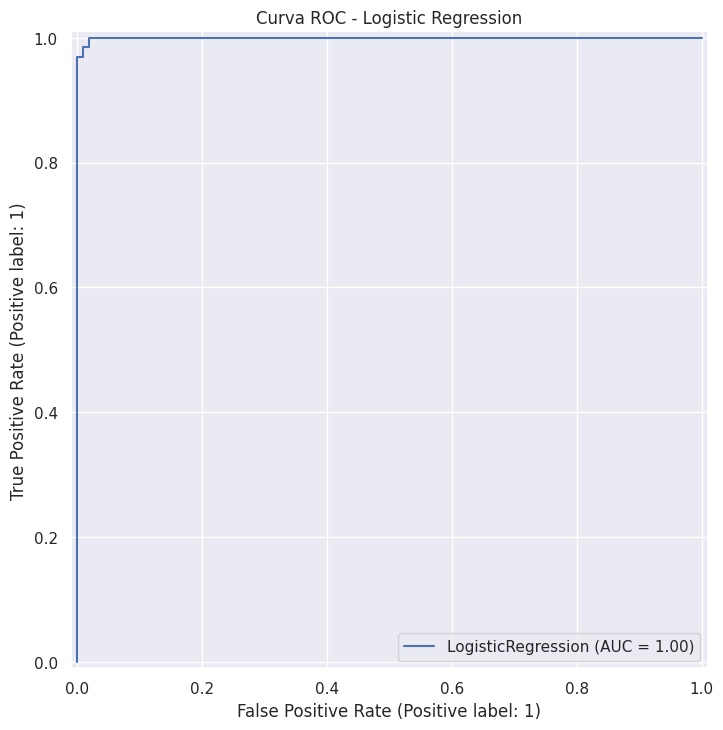

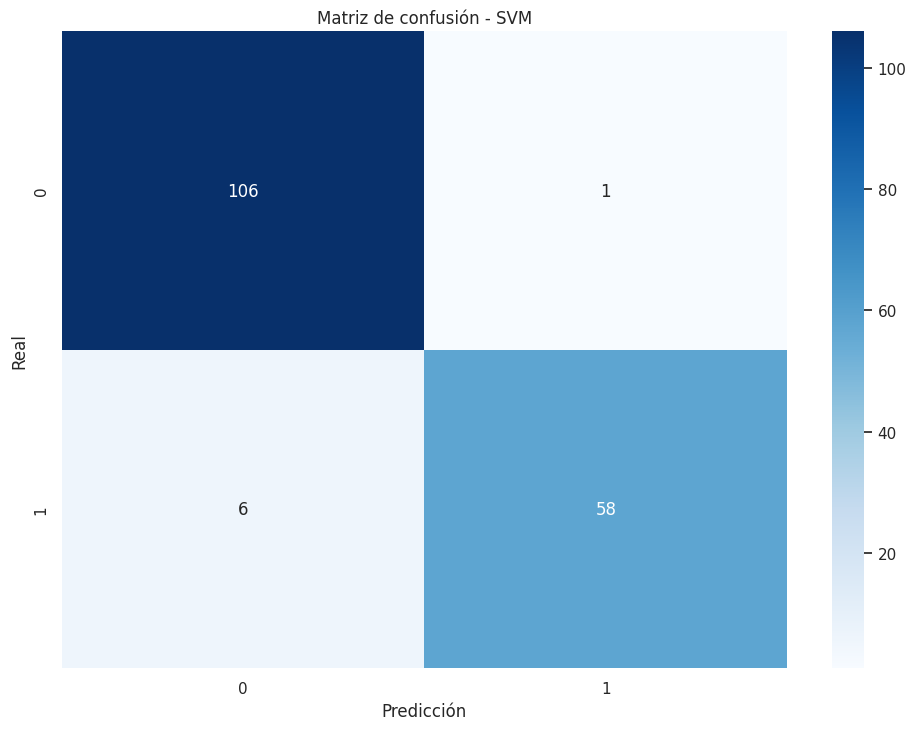

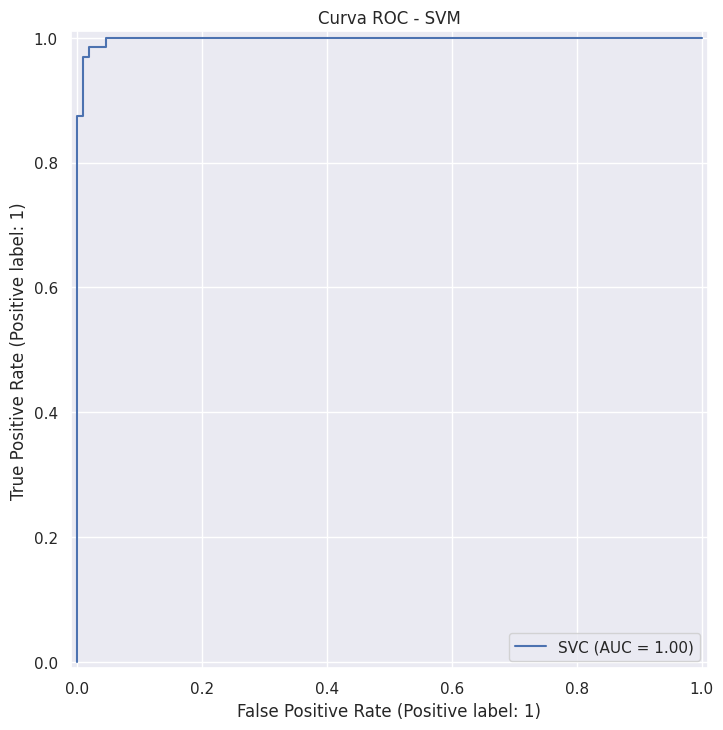

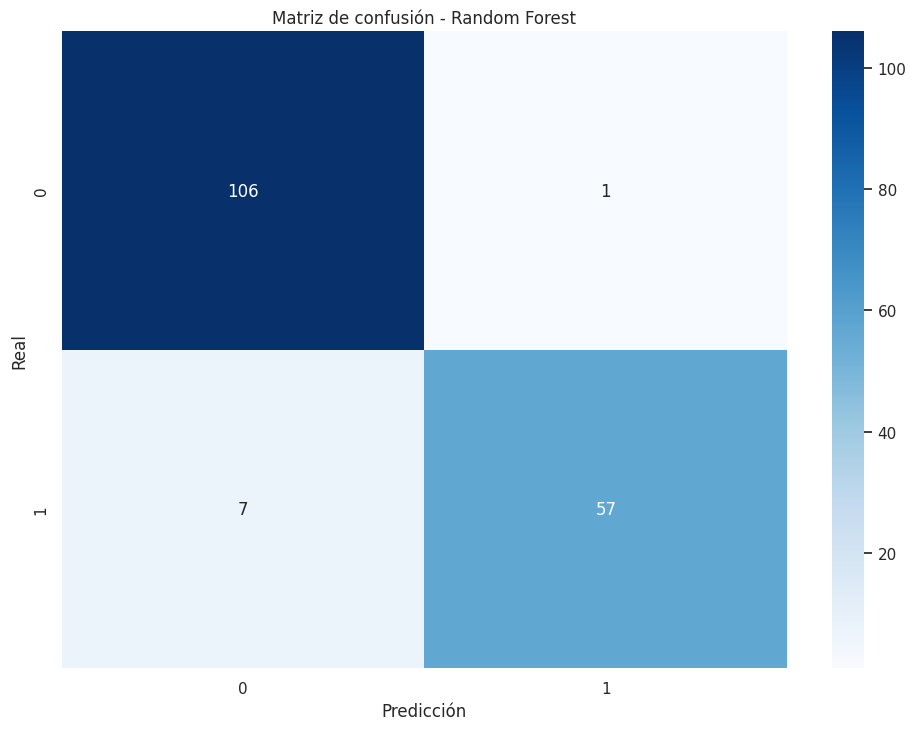

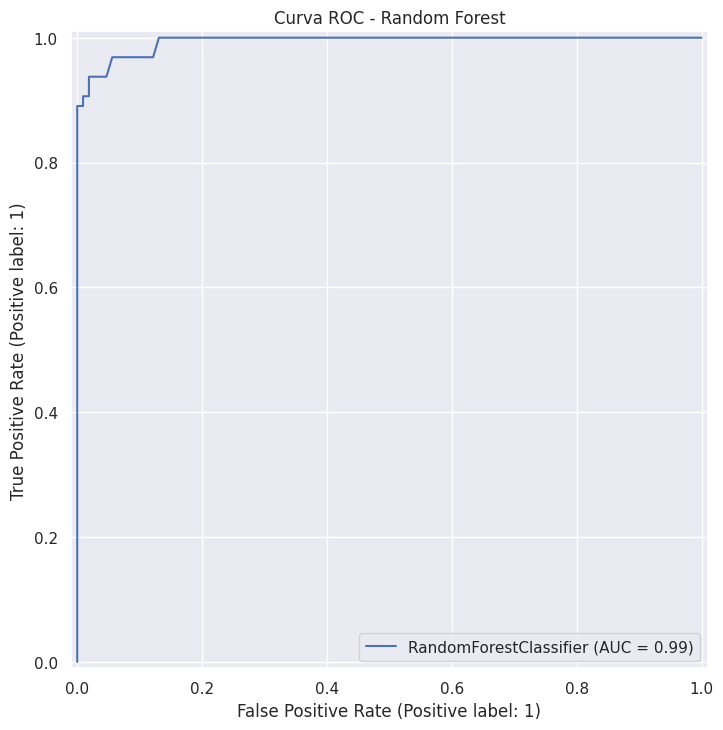

,Modelo,Accuracy,Precision,Recall,F1,AUC
0,Logistic Regression,0.982456,1.000000,0.953125,0.976000,0.999562
1,SVM,0.959064,0.983051,0.906250,0.943089,0.998102
2,Random Forest,0.953216,0.982759,0.890625,0.934426,0.993721


Modelo ganador por F1: Logistic Regression


In [31]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay
#1. Logistic Regression
param_log = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10],
    "solver": ["saga"],        # saga soporta L1 y L2
    "max_iter": [2000]
}
log_gs = GridSearchCV(LogisticRegression(), param_log, cv=5, scoring="f1", n_jobs=-1)
log_gs.fit(X_train, y_train)
log_best = log_gs.best_estimator_

#2. SVM: dos grids (linear y rbf)
svm_linear_gs = GridSearchCV(
    SVC(kernel="linear", probability=True),
    {"C": [0.1, 1, 10]},
    cv=5, scoring="f1", n_jobs=-1
)
svm_linear_gs.fit(X_train, y_train)

svm_rbf_gs = GridSearchCV(
    SVC(kernel="rbf", probability=True),
    {"C": [0.1, 1, 10], "gamma": ["scale", 0.01, 0.001]},
    cv=5, scoring="f1", n_jobs=-1
)
svm_rbf_gs.fit(X_train, y_train)

#Escoge el mejor de ambos SVM
svm_best = svm_linear_gs if svm_linear_gs.best_score_ >= svm_rbf_gs.best_score_ else svm_rbf_gs
svm_best = svm_best.best_estimator_

#3.Random Forest
param_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_leaf": [1, 2],
}
rf_gs = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=5, scoring="f1", n_jobs=-1)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_

#4.Evaluación unificada
models = {
    "Logistic Regression": log_best,
    "SVM": svm_best,
    "Random Forest": rf_best
}

rows = []
for name, mdl in models.items():
    y_pred = mdl.predict(X_test)
    y_prob = mdl.predict_proba(X_test)[:, 1]
    rows.append({
        "Modelo": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob),
    })

metrics_df = pd.DataFrame(rows).sort_values("F1", ascending=False)
display(metrics_df)

#5.Gráficas por cada modelo
for name, mdl in models.items():
    y_pred = mdl.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de confusión - {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    RocCurveDisplay.from_estimator(mdl, X_test, y_test)
    plt.title(f"Curva ROC - {name}")
    plt.show()

df_results = pd.DataFrame(rows, columns=["Modelo","Accuracy","Precision","Recall","F1","AUC"])
display(df_results.sort_values(by="F1", ascending=False))

#6)Elegir ganador y remarcarlo
best_name = metrics_df.iloc[0]["Modelo"]
print(f"Modelo ganador por F1: {best_name}")


Los tres modelos obtuvieron un desempeño muy alto; sin embargo, la Regresión Logística logró el mejor F1-score y AUC, destacando en la correcta detección de tumores malignos.
SVM y Random Forest también funcionaron bien, pero con una sensibilidad ligeramente menor, lo que implica un mayor riesgo de falsos negativos.


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



El flujo completo de machine learning aplicado permitió clasificar eficazmente tumores mamarios en benignos y malignos. El preprocesamiento (escalamiento y reducción de multicolinealidad) contribuyó a mejorar la estabilidad de los modelos, mientras que el PCA confirmó una buena separabilidad entre clases.

Entre los modelos evaluados, la Regresión Logística mostró el mejor equilibrio entre precisión y sensibilidad, por lo que se considera la alternativa más adecuada para un contexto clínico donde es crucial minimizar falsos negativos.

Como mejora futura, sería útil incorporar validación externa y técnicas de balanceo de clases, además de explorar modelos como Gradient Boosting para robustecer la generalización en escenarios reales.